In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score



In [2]:
df=pd.read_csv("Advertising.csv",index_col=[0])
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.isnull().sum().sum()

0

In [6]:
#pip install missingno

In [7]:
import missingno as msno

<AxesSubplot:>

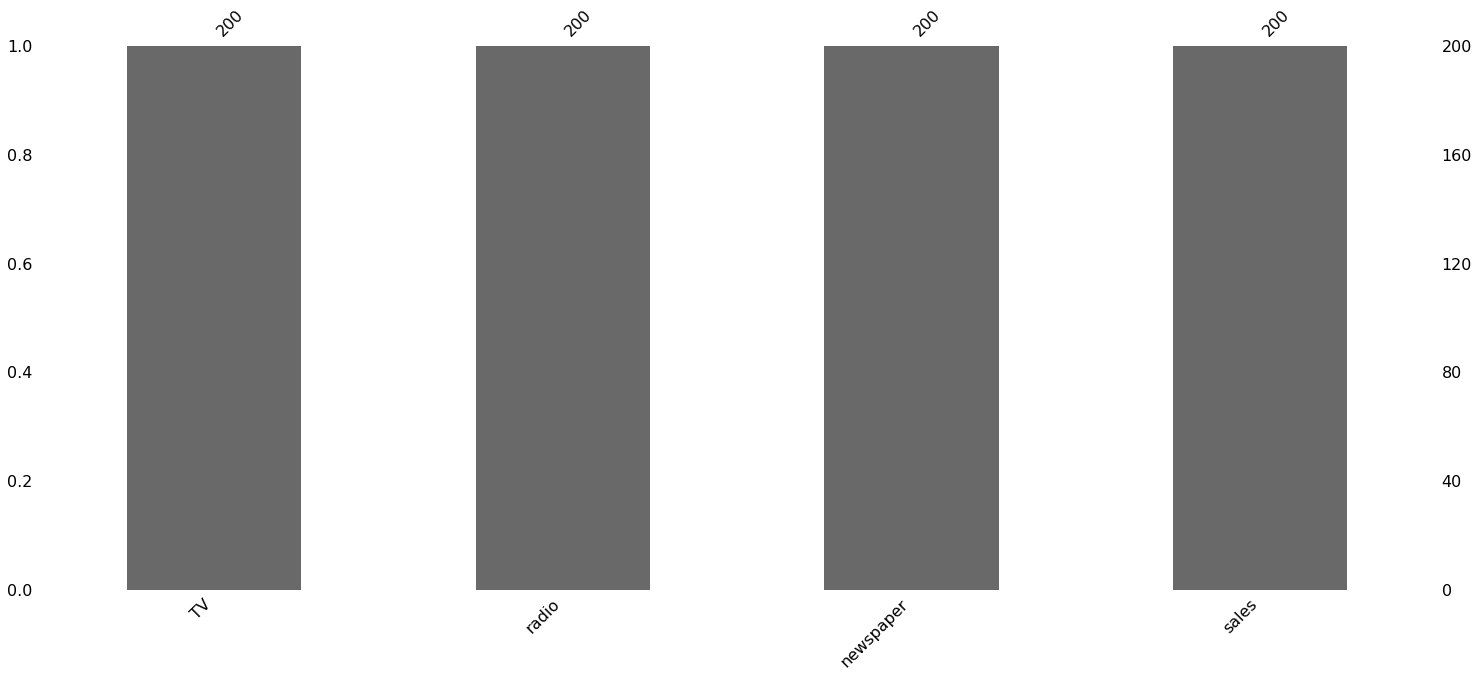

In [8]:
msno.bar(df)

In [9]:
# checkong linearity

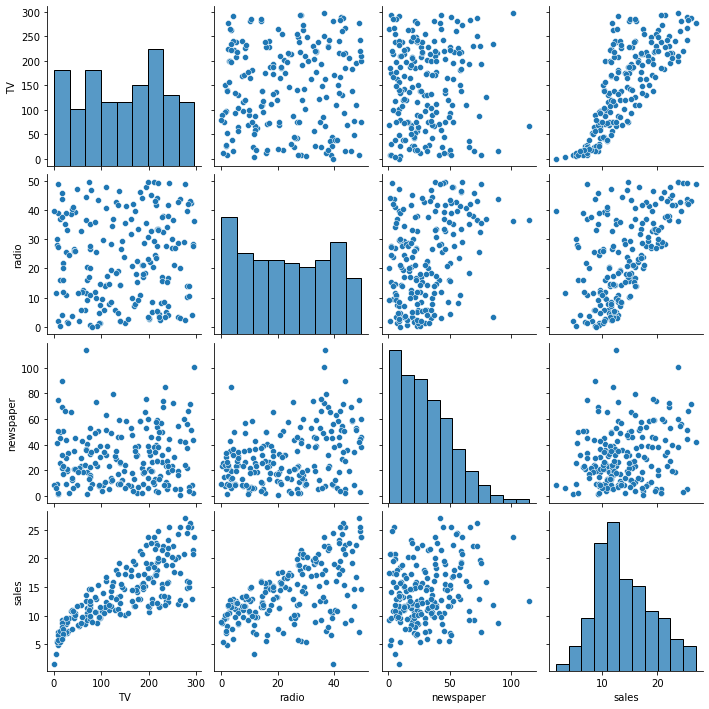

In [10]:
sns.pairplot(df);

### from this output we can say tat there is sort of linear relation btw tv and sale and there not much linearity found in radio with sale but there no linear relarion btw newpapaer  and sale.

## find correlation

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\Users\ad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

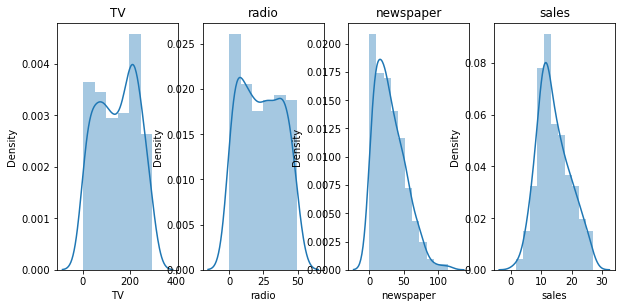

In [12]:
## distribution
pos=1
plt.figure(figsize=(10,10))
for i in df.columns:
    plt.subplot(2,4,pos)
    sns.distplot(df[i])
    plt.title(i)
    pos+=1

In [13]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\

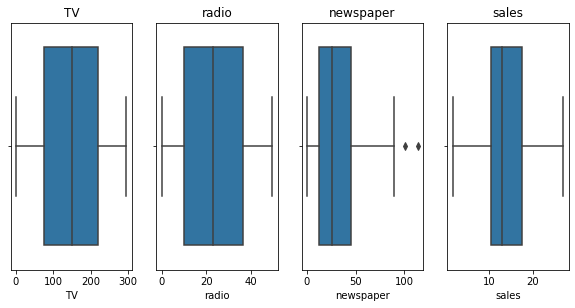

In [14]:
pos=1
plt.figure(figsize=(10,10))
for i in df.columns:
    plt.subplot(2,4,pos)
    sns.boxplot(df[i])
    plt.title(i)
    pos+=1

In [15]:
## seggregate

In [16]:
x=df.drop(columns=["sales"])
y=df["sales"]


In [17]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [18]:
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

## checking malticoolinearity

In [19]:
vif = pd.DataFrame()  ##creating blank dataframe 
#vif
variables  = x_scaled
#variables.shape
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
#vif["VIF"]
vif["features"]=x.columns
#vif["features"]
vif



,VIF,features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


### there is no multicoolinearity in data bcz vif is less then 4

### split tha data into train and test data.

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

### Now checking tha shape of train  data and  test data.

In [23]:
print(y_train.shape)
print(x_train.shape)


(160,)
(160, 3)


In [24]:
print(y_test.shape)
print(x_test.shape)

(40,)
(40, 3)


In [25]:
## linear regression 

In [31]:
lr=LinearRegression()

## train model.

In [32]:
lr.fit(x_train,y_train)  ## training

LinearRegression()

In [33]:
lr.coef_   ## m

array([4.01161205, 2.64417846, 0.05618258])

In [36]:
lr.intercept_  ## b

14.02854796400448

In [38]:
#line not form butplan formed

In [ ]:
## equation of prediction line or best fit line.

## Evaluate tha model performance.

In [39]:
y_pred=lr.predict(x_test)
print(y_pred)

[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]


In [40]:
r2_score(y_test,y_pred)

0.8927605914615385

In [43]:
#y=b1*x1+b2*x2+b3*x3+b0

In [44]:
#y=4.01*tv+2.64*radio+0.05*newspaper

### tha amount invest on tv is would be more effective to increase tha sale.
### how much  sale gets increase 4.01 times tha amount sppend in tv

In [ ]:
future data
tv=100
radio=50
newspaper=40

In [47]:
y=4.01*100+2.64*50+0.05*40+14
y

549.0

In [ ]:
sale=549